In [23]:
from pandas import read_csv, DataFrame
import pandas as pd
import numpy as np


#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase

filepath=r'dataset/df_msg_encoded.csv'

file_tag = 'df_msg_MV'

# Load

In [24]:
# test_data=True
test_data=False

if test_data==True:

    data=pd.read_csv(filepath)

    # 1% sample
    data=data.sample(frac=0.01, replace=False)
    

else:
    data=pd.read_csv(filepath)
    # 50% sample
    # data=data.sample(frac=0.5, replace=False)

 
target='is_unsubscribed'

# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
data.sort_values(by='day_of_year', inplace=True) 

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 798944 entries, 0 to 798943
Data columns (total 42 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   channel_msg                              798944 non-null  float64
 1   platform                                 52953 non-null   float64
 2   email_provider                           376193 non-null  float64
 3   is_opened                                798944 non-null  float64
 4   is_clicked                               798944 non-null  float64
 5   is_unsubscribed                          798944 non-null  float64
 6   is_hard_bounced                          798944 non-null  float64
 7   is_soft_bounced                          798944 non-null  float64
 8   is_complained                            798944 non-null  float64
 9   is_purchased                             798944 non-null  float64
 10  campaign_type                        

# DSLabs functions

In [25]:
%run "scripts/dslabs_functions.py"

dslabs lodaded


In [26]:
%run "scripts/data_functions.py"

data_functions lodaded


In [27]:
from pandas import read_csv, DataFrame
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_bar_chart

# MV Analysis

Variables with their respective percentages of missing values:
days_diff_complained_at_sent_at: 99.96%
days_diff_purchased_at_sent_at: 99.94%
days_diff_clicked_first_time_at_sent_at: 98.33%
days_diff_unsubscribed_at_sent_at: 96.26%
platform: 93.37%
days_diff_opened_first_time_at_sent_at: 85.35%
days_diff_first_purchase_date_sent_at: 80.97%
email_provider: 52.91%
total_count: 11.67%
days_diff_started_at_sent_at: 11.67%
subject_length: 8.94%
subject_with_personalization: 8.94%
subject_with_deadline: 8.94%
subject_with_emoji: 8.94%
subject_with_bonuses: 8.94%
subject_with_discount: 8.94%
subject_with_saleout: 8.94%
topic: 0.90%


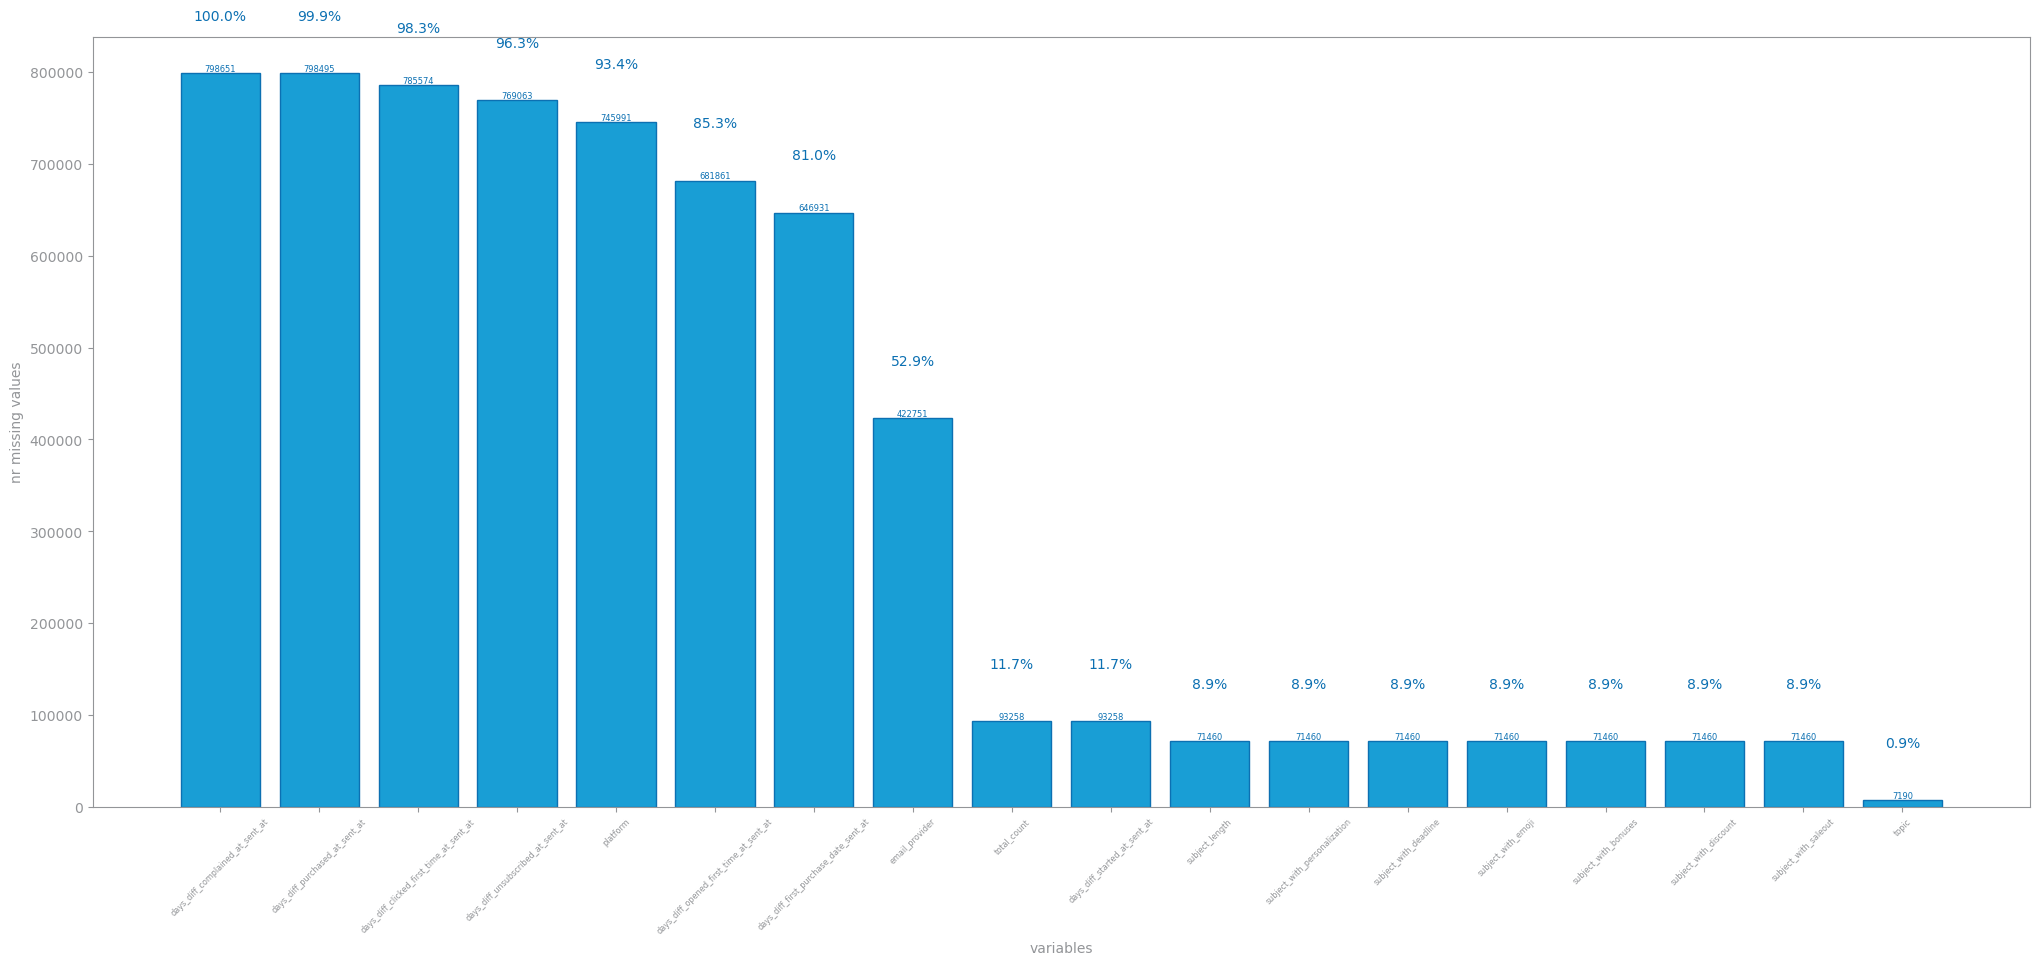

In [27]:
mv: dict[str, int] = {}
total_rows = len(data)

# Calculate the number of missing values and percentage for each variable
for var in data.columns:
    nr: int = data[var].isna().sum()
    if nr > 0:
        percentage = (nr / total_rows) * 100
        mv[var] = (nr, percentage)

# Sort the dictionary by the number of missing values in descending order
sorted_mv = dict(sorted(mv.items(), key=lambda item: item[1][0], reverse=True))

variables = list(sorted_mv.keys())
missing_values = [val[0] for val in sorted_mv.values()]
percentages = [val[1] for val in sorted_mv.values()]

# Print the list of variables with their respective percentages of missing values
print("Variables with their respective percentages of missing values:")
for var, perc in zip(variables, percentages):
    print(f"{var}: {perc:.2f}%")

# Plotting the bar chart
figure(figsize=(25, 10))  # (width, height)

plot_bar_chart(
    variables,
    missing_values,
    xlabel="variables",
    ylabel="nr missing values",
)

# Annotate the bars with percentages
for i, (var, perc) in enumerate(zip(variables, percentages)):
    text(i, missing_values[i] + max(missing_values) * 0.08, f"{perc:.1f}%", ha="center", va="center_baseline")

# Display the chart
show()


In [28]:
data.shape[0]

798944

In [29]:
data.columns

Index(['channel_msg', 'platform', 'email_provider', 'is_opened', 'is_clicked',
       'is_unsubscribed', 'is_hard_bounced', 'is_soft_bounced',
       'is_complained', 'is_purchased', 'campaign_type', 'channel_cmp',
       'topic', 'total_count', 'subject_length',
       'subject_with_personalization', 'subject_with_deadline',
       'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount',
       'subject_with_saleout', 'day_of_year', 'is_weekend', 'month',
       'time_of_day', 'days_diff_opened_first_time_at_sent_at',
       'days_diff_clicked_first_time_at_sent_at',
       'days_diff_unsubscribed_at_sent_at', 'days_diff_complained_at_sent_at',
       'days_diff_purchased_at_sent_at',
       'days_diff_first_purchase_date_sent_at', 'days_diff_started_at_sent_at',
       'hour_sin', 'hour_cos', 'min_sin', 'min_cos', 'day_of_month_sin',
       'day_of_month_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos',
       'week_of_month_sin', 'week_of_month_cos'],
      dtype='obje

# Strategies

# MV 1 - Most Frequent Srategy

## MV1 strategy apply

In [31]:
from numpy import ndarray
from pandas import concat
from sklearn.impute import SimpleImputer, KNNImputer
from dslabs_functions import get_variable_types, mvi_by_filling

# this script is available in data_functions originally from DSLabs site in Missing Values chapter

def apply_strategy_1(df):

    data_copy=data.copy()
    data_copy = data_copy.drop(columns=['days_diff_complained_at_sent_at','days_diff_purchased_at_sent_at',
                            "days_diff_clicked_first_time_at_sent_at","days_diff_unsubscribed_at_sent_at",
                           "days_diff_opened_first_time_at_sent_at", "days_diff_first_purchase_date_sent_at"])
    data_copy = mvi_by_filling(data_copy, strategy="frequent")

    return data_copy

data_1=apply_strategy_1(data)
data_1.describe()


,platform,email_provider,campaign_type,channel_cmp,topic,total_count,subject_length,day_of_year,month,hour_sin,...,is_purchased,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout,is_weekend,time_of_day,days_diff_started_at_sent_at
count,798944.000000,798944.000000,798944.000000,798944.000000,798944.000000,7.989440e+05,798944.000000,798944.000000,798944.000000,798944.000000,...,798944.000000,798944.000000,798944.000000,798944.000000,798944.000000,798944.000000,798944.000000,798944.000000,798944.000000,798944.000000
mean,2.331936,1.907159,0.206170,1.439694,10.403497,6.322837e+05,108.186812,137.813902,1.002771,0.636192,...,0.000562,0.000790,0.024163,0.983760,0.011043,0.003848,0.029023,0.049429,0.116322,-0.876876
std,0.319571,2.245180,0.585278,0.652112,2.048816,3.633504e+05,22.212247,12.028456,0.527985,0.443579,...,0.023700,0.028092,0.153556,0.126398,0.104505,0.061909,0.167872,0.216762,0.320611,0.328579
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.674000e+03,32.000000,120.000000,0.000000,-0.942000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,2.331936,1.000000,0.000000,1.000000,11.000000,2.319720e+05,97.000000,126.000000,1.000000,0.631000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,2.331936,1.907159,0.000000,2.000000,11.000000,6.518590e+05,108.186812,140.000000,1.000000,0.817000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
75%,2.331936,1.907159,0.000000,2.000000,11.000000,1.037337e+06,115.000000,147.000000,1.000000,0.942000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
max,3.000000,44.000000,2.000000,2.000000,13.000000,1.045217e+06,185.000000,165.000000,2.000000,0.998000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [32]:
data_1.columns

Index(['platform', 'email_provider', 'campaign_type', 'channel_cmp', 'topic',
       'total_count', 'subject_length', 'day_of_year', 'month', 'hour_sin',
       'hour_cos', 'min_sin', 'min_cos', 'day_of_month_sin',
       'day_of_month_cos', 'day_of_week_nr_sin', 'day_of_week_nr_cos',
       'week_of_month_sin', 'week_of_month_cos', 'channel_msg', 'is_opened',
       'is_clicked', 'is_unsubscribed', 'is_hard_bounced', 'is_soft_bounced',
       'is_complained', 'is_purchased', 'subject_with_personalization',
       'subject_with_deadline', 'subject_with_emoji', 'subject_with_bonuses',
       'subject_with_discount', 'subject_with_saleout', 'is_weekend',
       'time_of_day', 'days_diff_started_at_sent_at'],
      dtype='object')

## MV1 train/test split 

Labels=[0.0, 1.0]


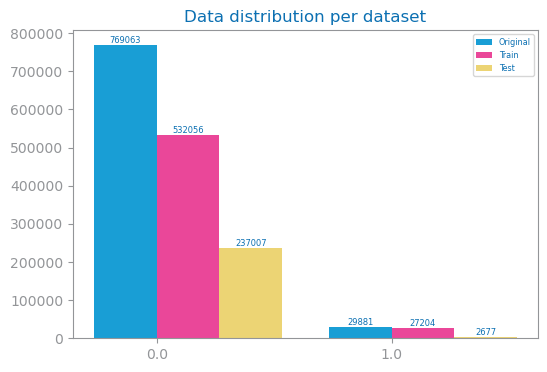

In [33]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart
from numpy import array, ndarray


y_1, X_1, labels, values = define_target_and_prepare_data(data_1, target)


# Call the function to split the data
train_1, test_1 = split_data_save_csv(pd.DataFrame(X_1, columns=data_1.columns), y_1, data_columns=data_1.columns, target_column=target)

# Distribution check
values["Train"] = [
    len(train_1[train_1[target] == 0]),
    len(train_1[train_1[target] == 1]),
]
values["Test"] = [
    len(test_1[test_1[target] == 0]),
    len(test_1[test_1[target] == 1]),
]

# Visualize the distribution
figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")
show()

## MV1 evaluate

se eu tentar retirar as colunas com high MV, este evaluate fica vazio, com output Evaluation data: {}

In [34]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
# removed Multinomial from run_NB function because dataset has negative values

from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_NB, run_KNN

figure()
eval_1: dict[str, list] = evaluate_approach(train_1, test_1, target='is_unsubscribed', metric="recall")

if not eval_1 or all(len(values) == 0 for values in eval_1.values()):
    print("No data available to plot. Please check the input data.")
else:
    figure()
    plot_multibar_chart(
        ["NB", "KNN"], eval_1, title=f"{file_tag}_mv1_evaluation", percentage=True
    )
    savefig(f"images/{file_tag}_mv1_evaluation.png")
    show()

No data available to plot. Please check the input data.


<Figure size 640x480 with 0 Axes>

In [35]:
print("Evaluation data:", eval_1)


Evaluation data: {}


# MV2 - drop null strategy - columns

1. Remove 7 variables due to high % of null values. Also, since we are not sure of its quality it makes more sense to remove it altogether without sacrificing the number of rows
2. Remove remaining null values records 

In [32]:

#data = data.drop(columns=["days_diff_complained_at_sent_at", "days_diff_purchased_at_sent_at", 
#                          "days_diff_clicked_first_time_at_sent_at", "days_diff_unsubscribed_at_sent_at",
#                           "days_diff_opened_first_time_at_sent_at", "days_diff_first_purchase_date_sent_at"
#                          ])

## MV2 strategy apply

In [33]:
# numeric_vars: list[str] = get_variable_types(data)["numeric"]

def apply_strategy_2(df):

    df_copy=df.copy()

    df_copy = df_copy.drop(['days_diff_complained_at_sent_at','days_diff_purchased_at_sent_at',
                            "days_diff_clicked_first_time_at_sent_at","days_diff_unsubscribed_at_sent_at",
                           "days_diff_opened_first_time_at_sent_at", "days_diff_first_purchase_date_sent_at"], axis=1)
    df_copy = df_copy.dropna(axis=1, how="any") #axis=1, drop columns that contain any missing values.

    return df_copy

data_2=apply_strategy_2(data)

## MV2 target prep

In [34]:
y_2, X_2, labels, class_counts = define_target_and_prepare_data(data_2, target=target)


Labels=[0.0, 1.0]


## MV2 train/test split 

<Axes: title={'center': 'Data distribution per dataset'}>

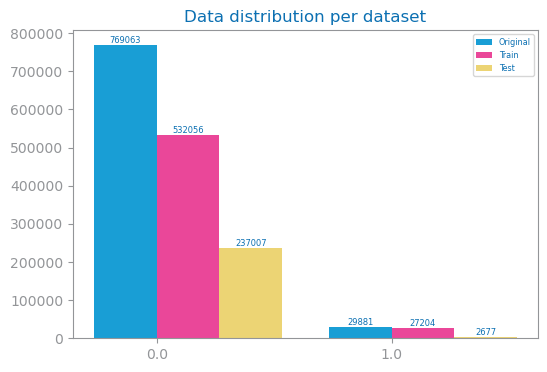

In [35]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart

# train/test split from DSLABS Classification/Evaluation Chapter
# created split_data_save_csv on data_functions

# Call the function to split the data
train_2, test_2 = split_data_save_csv(pd.DataFrame(X_2, columns=data_2.columns), y_2, data_columns=data_2.columns, target_column=target)


values["Train"] = [
    len(train_2[train_2[target] == 0]),
    len(train_2[train_2[target] == 1]),
]
values["Test"] = [
    len(test_2[test_2[target] == 0]),
    len(test_2[test_2[target] == 1]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

## MV2 evaluate

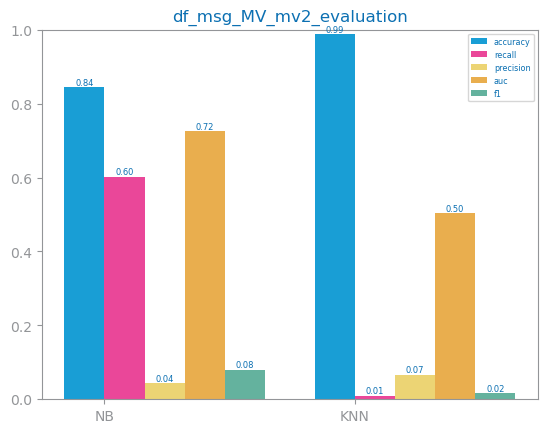

In [36]:

figure()
eval_2: dict[str, list] = evaluate_approach(train_2, test_2, target='is_unsubscribed', metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval_2, title=f"{file_tag}_mv2_evaluation", percentage=True
)
savefig(f"images/{file_tag}mv2_evaluation.png")
show()

# MV3 - drop null strategy - rows

1. Remove 7 variables due to high % of null values. Also, since we are not sure of its quality it makes more sense to remove it altogether without sacrificing the number of rows
2. Remove remaining null values records 

## MV3 strategy apply

In [48]:
# numeric_vars: list[str] = get_variable_types(data)["numeric"]

def apply_strategy_3(df):

    df_copy=df.copy()

    df_copy = df_copy.drop(['days_diff_complained_at_sent_at','days_diff_purchased_at_sent_at',
                            "days_diff_clicked_first_time_at_sent_at","days_diff_unsubscribed_at_sent_at",
                           "days_diff_opened_first_time_at_sent_at", "days_diff_first_purchase_date_sent_at"], axis=1)
    df_copy = df_copy.dropna(axis=0, how="any") #axis=0 tells dropna to remove rows that have at least one NaN value.

    return df_copy

data_3=apply_strategy_3(data)

## MV3 target prep

In [49]:
y_3, X_3, labels, class_counts = define_target_and_prepare_data(data_3, target=target)


Labels=[0.0, 1.0]


## MV3 train/test split 

<Axes: title={'center': 'Data distribution per dataset'}>

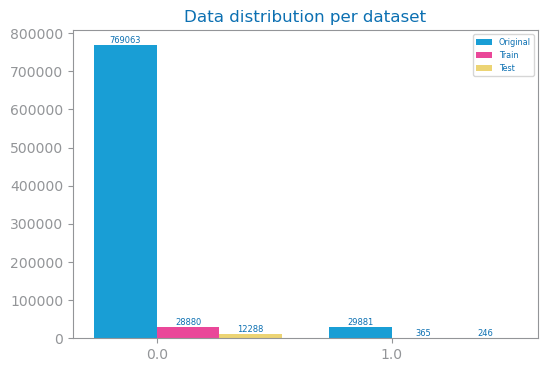

In [50]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart

# train/test split from DSLABS Classification/Evaluation Chapter
# created split_data_save_csv on data_functions

# Call the function to split the data
train_3, test_3 = split_data_save_csv(pd.DataFrame(X_3, columns=data_3.columns), y_3, data_columns=data_3.columns, target_column=target)


values["Train"] = [
    len(train_3[train_3[target] == 0]),
    len(train_3[train_3[target] == 1]),
]
values["Test"] = [
    len(test_3[test_3[target] == 0]),
    len(test_3[test_3[target] == 1]),
]

figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")

## MV3 evaluate

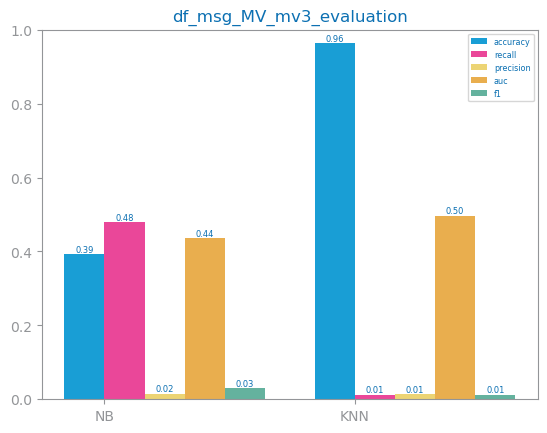

In [51]:

figure()
eval_3: dict[str, list] = evaluate_approach(train_3, test_3, target='is_unsubscribed', metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval_3, title=f"{file_tag}_mv3_evaluation", percentage=True
)
savefig(f"images/{file_tag}mv3_evaluation.png")
show()

# MV4 - knn strategy

## MV4 strategy apply
haven't been able to run it. very computationally heavy and takes way too long 1h++

In [6]:
from numpy import ndarray
from pandas import concat
from sklearn.impute import SimpleImputer, KNNImputer
from dslabs_functions import get_variable_types, mvi_by_filling

# this script is available in data_functions originally from DSLabs site in Missing Values chapter

def apply_strategy_4(df):

    data_copy=data.copy()
    data_copy = mvi_by_filling(data_copy, strategy="knn")

    return data_copy

data_4=apply_strategy_4(data)
data_4.describe()


## MV4 train/test split 

Labels=[0.0, 1.0]


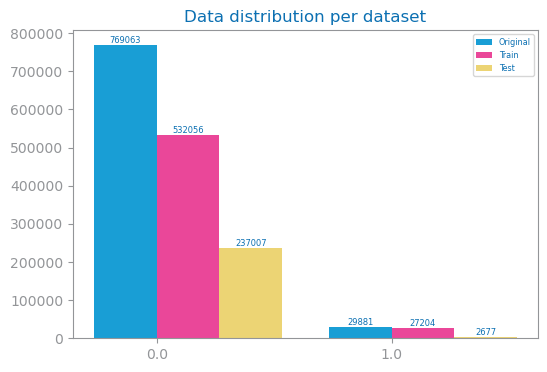

In [ ]:
from pandas import concat
from matplotlib.pyplot import figure, show
from sklearn.model_selection import train_test_split
from dslabs_functions import plot_multibar_chart
from numpy import array, ndarray


y_4, X_4, labels, values = define_target_and_prepare_data(data_4, target)


# Call the function to split the data
train_4, test_4 = split_data_save_csv(pd.DataFrame(X_4, columns=data_4.columns), y_4, data_columns=data_4.columns, target_column=target)

# Distribution check
values["Train"] = [
    len(train_4[train_4[target] == 0]),
    len(train_4[train_4[target] == 1]),
]
values["Test"] = [
    len(test_4[test_4[target] == 0]),
    len(test_4[test_4[target] == 1]),
]

# Visualize the distribution
figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")
show()

## MV4 evaluate

In [ ]:
# evaluate_approach is in data_functions originally from DSLABS/ Data Prep / Methodology
# removed Multinomial from run_NB function because dataset has negative values

from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_NB, run_KNN

figure()
eval_4: dict[str, list] = evaluate_approach(train_4, test_4, target='is_unsubscribed', metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval_4, title=f"{file_tag}_mv4_evaluation", percentage=True
)
savefig(f"images/{file_tag}_mv4_evaluation.png")
show()

ModuleNotFoundError: No module named 'dslabs_functions'

# Approach uplift comparison

## uplift df

In [59]:
algorithms = ['Naive Bayes', 'KNN']

# Create DataFrames for eval_1 and eval_2
df_eval_1 = pd.DataFrame(eval_1, index=algorithms)
df_eval_4 = pd.DataFrame(eval_4, index=algorithms)

# Calculate uplift
df_uplift = df_eval_1 - df_eval_4

# Combine everything into one DataFrame (without misalignment issues)
comparison_df = pd.concat([df_eval_1, df_eval_4, df_uplift], axis=1)
comparison_df.columns = pd.MultiIndex.from_product([['Approach 1', 'Approach 4', 'Uplift'], eval_1.keys()])

# Display the DataFrame
comparison_df

Approach 1                                         Approach 4  \
              accuracy    recall precision       auc        f1   accuracy   
Naive Bayes   0.997814  0.804258  1.000000  0.902129  0.891511   0.997814   
KNN           0.994025  0.617109  0.802331  0.807696  0.697635   0.994025   

                                                      Uplift                   \
               recall precision       auc        f1 accuracy recall precision   
Naive Bayes  0.804258  1.000000  0.902129  0.891511      0.0    0.0       0.0   
KNN          0.617109  0.802331  0.807696  0.697635      0.0    0.0       0.0   

                       
             auc   f1  
Naive Bayes  0.0  0.0  
KNN          0.0  0.0

## t test

In [60]:

from scipy.stats import ttest_rel


# Perform paired t-tests for each metric
t_test_results = {'t_stat': [], 'p_value': []}
for metric in eval_1.keys():
    t_stat, p_value = ttest_rel(df_eval_1[metric], df_eval_4[metric])
    t_test_results['t_stat'].append(t_stat)
    t_test_results['p_value'].append(p_value)

# Create DataFrame for t-test results
df_ttest = pd.DataFrame(t_test_results, index=eval_1.keys())

# Convert t-test results to a DataFrame with MultiIndex and concatenate it
df_ttest_multi = pd.DataFrame({
    ('t_test', 't_stat'): df_ttest['t_stat'],
    ('t_test', 'p_value'): df_ttest['p_value']
})

df_ttest_multi

t_test        
          t_stat p_value
accuracy     NaN     NaN
recall       NaN     NaN
precision    NaN     NaN
auc          NaN     NaN
f1           NaN     NaN

# Analysis

# save to csv

In [ ]:
if test_data==False:
    
    data=apply_strategy_1(data)
    
    data.to_csv(f"dataset/df_msg_mv_input.csv", index=False)
    